In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heat
%pylab inline
%load_ext autoreload  
%autoreload 2
from scipy import ndimage
#from scipy.interpolate import interpn


Populating the interactive namespace from numpy and matplotlib


In [3]:
matplotlib.rcParams.update({'font.size': 20})

In [4]:
#   passing xarr,yarr,zarr coordinate arrays
#   temperature array is tarr
#   summing those within a distance of midplane 
#   use Gaussian weighting as a function of distance from plane
#   binning uses dx and xmax to make grid
def tempxysig(xarr,yarr,zarr,tarr,dx,xmax,sigz):
    pixarea =  dx*dx;  # 
    n = np.size(xarr);
    dy = dx
    xmin = -xmax;
    ymax = xmax; ymin = -ymax;
    nx = np.int((xmax-xmin)/dx) + 1;
    ny = nx
    yarrh,xarrh = np.meshgrid(np.arange(ymin,ymax+dy,dy),\
                np.arange(xmin,xmax+dx,dx) )  #nontrivial order here, is flipped
    #xarrh[i,*] gives x depending on i and is all the same for second index
    mhist = xarrh*0.0;
    whist = xarrh*0.0;
    poff = 0.0;  # pixel offset
    for i in range (0,n):  # loop over particles
        if (np.abs(zarr[i]) < 3*sigz):
            zg = 0.5*(zarr[i]/sigz)**2
            weight = np.exp(-zg) # gaussian weight
            xi = np.int((xarr[i] - xmin)/dx + poff);
            yi = np.int((yarr[i] - ymin)/dy + poff);
            if ((xi >=0) and (xi<nx)):
                if ((yi >=0) and (yi<ny)):
                    mhist[xi,yi]+= weight*tarr[i]  # averaging with weights via z
                    #checked order!
                    whist[xi,yi]+= weight; 
    #jj = np.where(whist >0.0)
    #mhist[jj] = mhist[jj]/whist[jj]
    mhist = mhist/whist
    return xarrh,yarrh,mhist   # note order



In [5]:
def nodefilename(froot,suffix,index):
    num1 = '{0:d}'.format(index)
    ff = froot + '_'
    if (index < 100000):
        ff = ff + '0'
    if (index < 10000):
        ff = ff + '0'
    if (index < 1000):
        ff = ff + '0'
    if (index < 100):
        ff = ff + '0'
    if (index < 10):
        ff = ff + '0'
    ff = ff + num1 + suffix
    print(ff)
    return ff

# for testing
#froot = '../heat_s18/a1'; suffix = '_node.txt'
#nfile = nodefilename(froot,suffix,6)
#print(nfile); #../heat_s18/a1_000006_node.txt

In [38]:
def plt_temp(froot,index,dx,sigz,vmax):
    suffix = '_node.txt'
    nfile0 = nodefilename(froot,suffix,0)
    iarr,xarr0,yarr0,zarr0,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile0, skiprows=2, unpack=True)
    nfile = nodefilename(froot,suffix,index)
    iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
    xmax = 1.1
    #dx = 0.10
    #sigz = 0.15
    xarrh,yarrh,mhist  = tempxysig(xarr0,yarr0,zarr0,tarr,dx,xmax,sigz)
    f, axarr = plt.subplots(1,1,sharex=True,sharey=True,figsize=(8.5,6));
    img=axarr.pcolormesh(xarrh,yarrh,mhist,vmin=0,vmax=vmax,cmap='inferno')
    axarr.set_aspect(1.0);
    cbar_ax = f.add_axes([0.830, 0.17, 0.03, 0.68])
    f.colorbar(img, cax=cbar_ax,format='%.1e')
    
def plt3_temp(froot,index,dx,sigz,vmax,xmax):
    suffix = '_node.txt'
    nfile0 = nodefilename(froot,suffix,0)
    iarr,xarr0,yarr0,zarr0,vxarr,vyarr,vzarr,tarr,cv,surf = \
        np.loadtxt(nfile0, skiprows=2, unpack=True)
    nfile = nodefilename(froot,suffix,index)
    iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = \
        np.loadtxt(nfile, skiprows=2, unpack=True)
    xarrh_a,yarrh_a,mhist_a  = tempxysig(xarr0,yarr0,zarr0,tarr,dx,xmax,sigz)
    xarrh_b,zarrh_b,mhist_b  = tempxysig(xarr0,zarr0,yarr0,tarr,dx,xmax,sigz)
    yarrh_c,zarrh_c,mhist_c  = tempxysig(yarr0,zarr0,xarr0,tarr,dx,xmax,sigz)
    
    f, axarr = plt.subplots(1,3,sharex=True,sharey=True,figsize=(8.5,3));
    f.subplots_adjust(hspace=0);
    f.subplots_adjust(wspace=0.05);
    f.subplots_adjust(left=0.07)
    f.subplots_adjust(right=0.82)
    #plt.axis('tight');
    x1 = xarrh_a
    plt.axis([x1.min(), x1.max(), x1.min(), x1.max()]);
    plt.setp([a.get_xticklabels() for a in f.axes], visible=False) ;
    plt.setp([a.get_yticklabels() for a in f.axes], visible=False) ;
    plt.setp(axarr[0].get_xticklabels(), visible=True) ;
    plt.setp(axarr[0].get_yticklabels(), visible=True) ;
    axarr[0].set_aspect(1.0);
    axarr[1].set_aspect(1.0);
    axarr[2].set_aspect(1.0);
    axarr[0].set_adjustable('box-forced')
    axarr[1].set_adjustable('box-forced')
    axarr[2].set_adjustable('box-forced')
    
    #max_a = np.max(mhist_a)
    #max_b = np.max(mhist_b)
    #max_c = np.max(mhist_c)
    max_all = np.max(tarr)

    img=axarr[0].pcolormesh(xarrh_a,yarrh_a,mhist_a,vmin=0,vmax=max_all,cmap='inferno')
    img=axarr[1].pcolormesh(xarrh_b,zarrh_b,mhist_b,vmin=0,vmax=max_all,cmap='inferno')
    img=axarr[2].pcolormesh(yarrh_c,zarrh_c,mhist_c,vmin=0,vmax=max_all,cmap='inferno')
    cbar_ax = f.add_axes([0.830, 0.17, 0.03, 0.68])
    f.colorbar(img, cax=cbar_ax,format='%.1e')
    d1=0.07; v1=0.05;
    d2=0.07; v2=0.09;
    pm = x1.max();
    axarr[0].text( pm-d1,-pm+v1,'x',ha='center',va='bottom',fontsize=16,color='green');
    axarr[0].text(-pm+d2, pm-v2,'y',ha='left',va='center',fontsize=16,color='green');
    axarr[1].text( pm-d1,-pm+v1,'x',ha='center',va='bottom',fontsize=16,color='green');
    axarr[1].text(-pm+d2, pm-v2,'z',ha='left',va='center',fontsize=16,color='green');
    axarr[2].text( pm-d1,-pm+v1,'y',ha='center',va='bottom',fontsize=16,color='green');
    axarr[2].text(-pm+d2, pm-v2,'z',ha='left',va='center',fontsize=16,color='green');
    #    plt.savefig(fname);



In [24]:
np.max([3,2,1])

3

../moon_heat/m1_out/m1_000000_node.txt
../moon_heat/m1_out/m1_000001_node.txt


//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


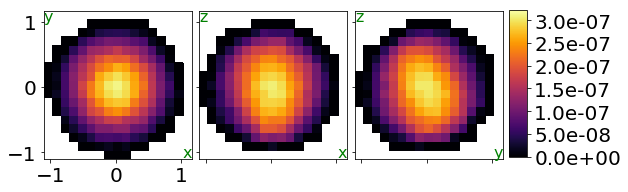

In [51]:
froot = '../moon_heat/m1_out/m1'; 
dx = 0.1333
sigz = 0.15
vmax = 4e-5 #not used
index=80
xmax=1.1
#plt3_temp(froot,10,dx,sigz,vmax*1.0,xmax)
plt3_temp(froot,1,dx,sigz,vmax*1.0,xmax)

In [256]:

froot = '../heat_s18/a1_out/a1'; suffix = '_node.txt'

index = 64
nfile = nodefilename(froot,suffix,index)
iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
rarr0 = np.sqrt(xarr**2 + yarr**2 + zarr**2); tarr0=tarr

index = 79
nfile = nodefilename(froot,suffix,index)
iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
tarr1=tarr 

index = 80
nfile = nodefilename(froot,suffix,index)
iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
tarr2=tarr

index = 81
nfile = nodefilename(froot,suffix,index)
iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
tarr5=tarr

index = 90
nfile = nodefilename(froot,suffix,index)
iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
tarr10=tarr

index = 95
nfile = nodefilename(froot,suffix,index)
iarr,xarr,yarr,zarr,vxarr,vyarr,vzarr,tarr,cv,surf = np.loadtxt(nfile, skiprows=2, unpack=True)
tarr18=tarr

../heat_s18/a1_out/a1_000064_node.txt
../heat_s18/a1_out/a1_000079_node.txt
../heat_s18/a1_out/a1_000080_node.txt
../heat_s18/a1_out/a1_000081_node.txt
../heat_s18/a1_out/a1_000090_node.txt
../heat_s18/a1_out/a1_000095_node.txt


3.187945e-06


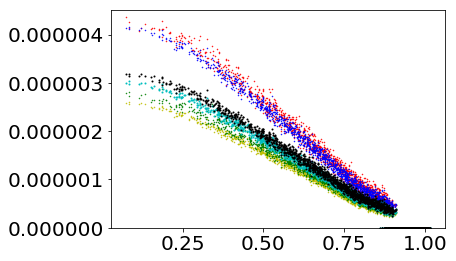

In [257]:
plt.plot(rarr0,tarr0,'y.', ms=1)
plt.plot(rarr0,tarr1,'g.', ms=1)
plt.plot(rarr0,tarr2,'r.', ms=1)
plt.plot(rarr0,tarr5,'b.', ms=1)
plt.plot(rarr0,tarr10,'c.', ms=2)
plt.plot(rarr0,tarr18,'k.', ms=2)
plt.ylim([0,4.5e-6])
print(max(tarr18))